###  Decision Trees- Overfit vs Underfit

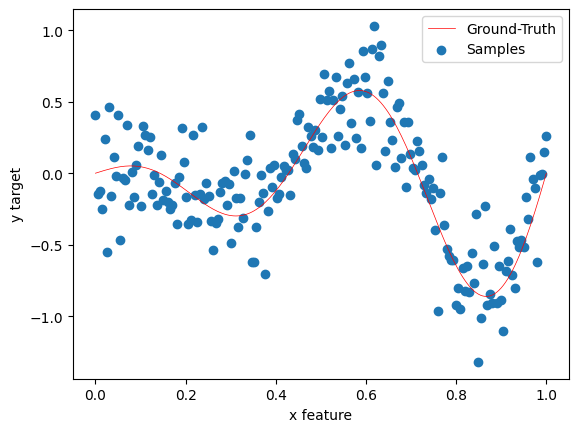

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n = 200
X = np.linspace(0,1,n)[:,np.newaxis]
Y_GT = X* np.cos(3.5 * np.pi * X)
Y = Y_GT + 0.25 * np.random.randn(n,1)
plt.plot(X,Y_GT,'red', linewidth=0.5)
plt.scatter(X,Y)
plt.xlabel('x feature')
plt.ylabel('y target')
plt.legend(["Ground-Truth", "Samples"])

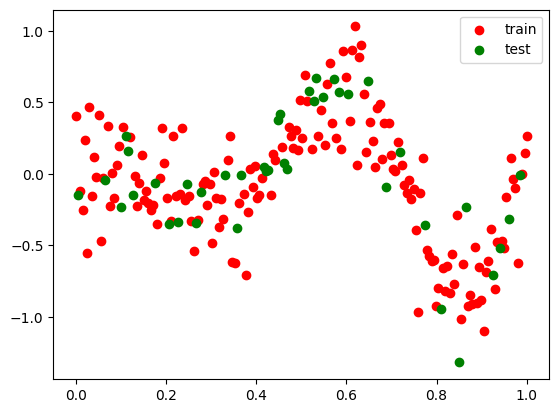

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, shuffle = True)
plt.scatter(X_train,Y_train,c='r')
plt.scatter(X_test,Y_test,c='g')
plt.legend(["train", "test"])

In [17]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(random_state=42)
DT.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

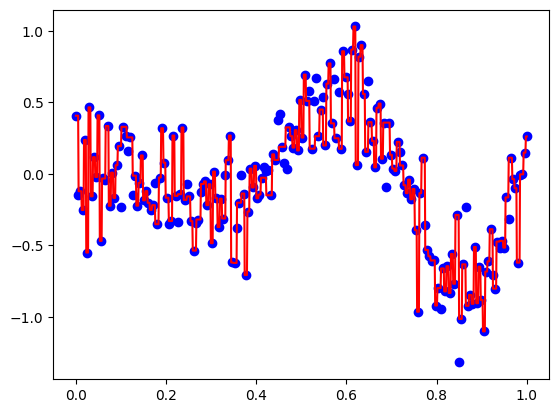

In [18]:
xx = np.linspace(X[:,0].min(),X[:,0].max(),1000)[:,np.newaxis]
y = DT.predict(xx)
plt.scatter(X,Y,c="b")
plt.plot(xx,y, c='red')

Text(0, 0.5, 'MSE')

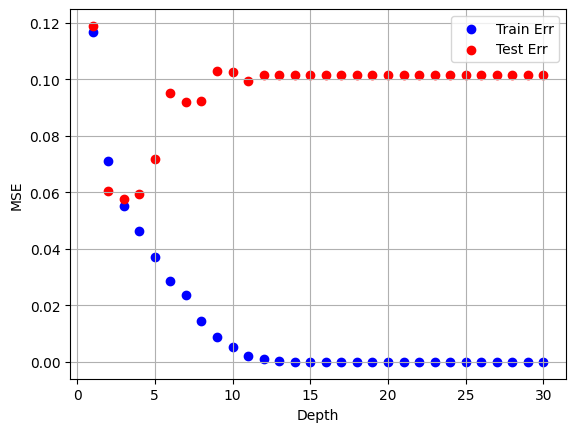

In [19]:
from sklearn.metrics import mean_squared_error
err_train, err_test = [], []
for i in range(1,31):
    DT = DecisionTreeRegressor(random_state=42, max_depth=i)
    DT.fit(X_train, Y_train)
    y_hat1 = DT.predict(X_train)
    err_train.append(mean_squared_error(Y_train,y_hat1))
    y_hat2 = DT.predict(X_test)
    err_test.append(mean_squared_error(Y_test,y_hat2))

plt.scatter(range(1, len(err_train)+1),err_train, c="b")
plt.scatter(range(1, len(err_test)+1),err_test, c="r")
plt.grid(True)
plt.legend(["Train Err", "Test Err"])
plt.xlabel("Depth")
plt.ylabel("MSE")